In [72]:
import pandas as pd
import numpy as np
from sklearn import datasets, svm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

In [52]:
df_mushroom_dataset = pd.read_csv('mushroom_cleaned.csv')

In [53]:
df_mushroom_dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [54]:
df_mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [55]:
print(df_mushroom_dataset.describe())

       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season         class  
count  54035.000000  54035.000000  54035.000000  54035.000000  54035.000000  
mean       0.759110   1051.081299      8.418062      0.952163      0.549181  
std        0.650969    782.056076      3.262078      0.305594      0.497580  
min        0.000426      0.000000      0.000000      0.027372      0.000000

## Scaling the data

In [56]:
X = df_mushroom_dataset.drop(columns=['class'])  # Features (all columns except 'class')
y = df_mushroom_dataset['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Divide data to train and tests

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## kNN

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("kNN Accuracy: ", accuracy_score(y_test, y_pred_knn))

kNN Accuracy:  0.9895438141945035


In [59]:
# Which K value is most accurate
for k in range(1, 11):  # Try K from 1 to 10
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    print(f"Accuracy with K={k}: {score:.2f}")

Accuracy with K=1: 0.99
Accuracy with K=2: 0.99
Accuracy with K=3: 0.99
Accuracy with K=4: 0.99
Accuracy with K=5: 0.99
Accuracy with K=6: 0.99
Accuracy with K=7: 0.99
Accuracy with K=8: 0.99
Accuracy with K=9: 0.99
Accuracy with K=10: 0.99


In [ ]:
#Loop over different values of k (1 to 10) for kNN without scaling
for k in range(1, 11):
    knn_no_scaling = KNeighborsClassifier(n_neighbors=k)
    knn_no_scaling.fit(X_train, y_train)
    y_pred_knn_no_scaling = knn_no_scaling.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn_no_scaling)
    print(f"kNN Accuracy without scaling (k={k}): {accuracy:.2f}")


kNN Accuracy without scaling (k=1): 0.99
kNN Accuracy without scaling (k=2): 0.99
kNN Accuracy without scaling (k=3): 0.99
kNN Accuracy without scaling (k=4): 0.99
kNN Accuracy without scaling (k=5): 0.99
kNN Accuracy without scaling (k=6): 0.99
kNN Accuracy without scaling (k=7): 0.99
kNN Accuracy without scaling (k=8): 0.99
kNN Accuracy without scaling (k=9): 0.99
kNN Accuracy without scaling (k=10): 0.99


## SVM

In [60]:
# Mallin koulutus ja ennustus
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Tarkkuus
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9080225779587304


In [61]:
for kernel in ['linear', 'rbf', 'poly']:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel={kernel}, Accuracy: {accuracy_score(y_test, y_pred)}")

Kernel=linear, Accuracy: 0.643379291200148
Kernel=rbf, Accuracy: 0.9080225779587304
Kernel=poly, Accuracy: 0.7639492921254742


In [ ]:
#Loop over different kernels for SVM without scaling
for kernel in ['linear', 'rbf', 'poly']:
    svm_no_scaling = SVC(kernel=kernel)
    svm_no_scaling.fit(X_train, y_train)
    y_pred_svm_no_scaling = svm_no_scaling.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_svm_no_scaling)
    print(f"SVM Accuracy without scaling (kernel={kernel}): {accuracy:.2f}")

SVM Accuracy without scaling (kernel=linear): 0.64
SVM Accuracy without scaling (kernel=rbf): 0.91
SVM Accuracy without scaling (kernel=poly): 0.76


In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)

## Confusion matrix

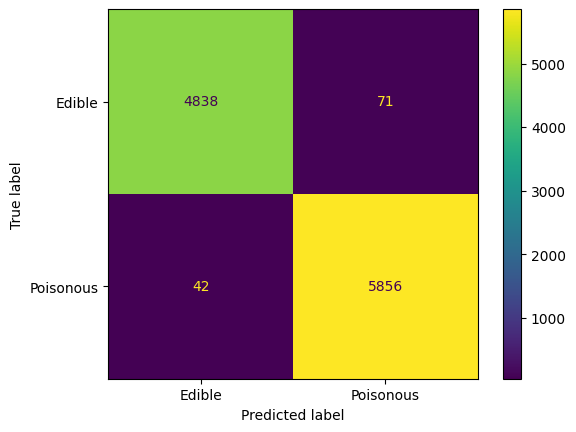

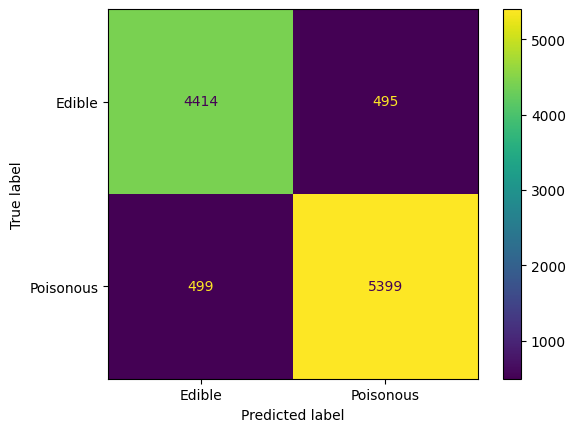

In [69]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

ConfusionMatrixDisplay(cm_knn, display_labels=["Edible", "Poisonous"]).plot()
ConfusionMatrixDisplay(cm_svm, display_labels=["Edible", "Poisonous"]).plot()

## kNN results

In [ ]:
print("kNN Classification Report (Scaled):")
print(classification_report(y_test, y_pred_knn))

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [ ]:
print("kNN Classification Report (No scaling):")
print(classification_report(y_test, y_pred_knn_no_scaling))

kNN Classification Report (Ei skaalausta):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



## SVM results

In [64]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4909
           1       0.92      0.92      0.92      5898

    accuracy                           0.91     10807
   macro avg       0.91      0.91      0.91     10807
weighted avg       0.91      0.91      0.91     10807



In [68]:
print("SVM Classification Report (No scaling):")
print(classification_report(y_test, y_pred_svm_no_scaling))

SVM Classification Report (No scaling):
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      4909
           1       0.77      0.80      0.79      5898

    accuracy                           0.76     10807
   macro avg       0.76      0.76      0.76     10807
weighted avg       0.76      0.76      0.76     10807

